# Neural Networks
### Contents
- Solving OR Gate problem using Adaline
- Solving the XOR Gate problem using Madaline

### Author
#### Aayushi Shrivastava

#### Date
24.11.2022

## .....................................................ADALINE.................................................

### Program #1

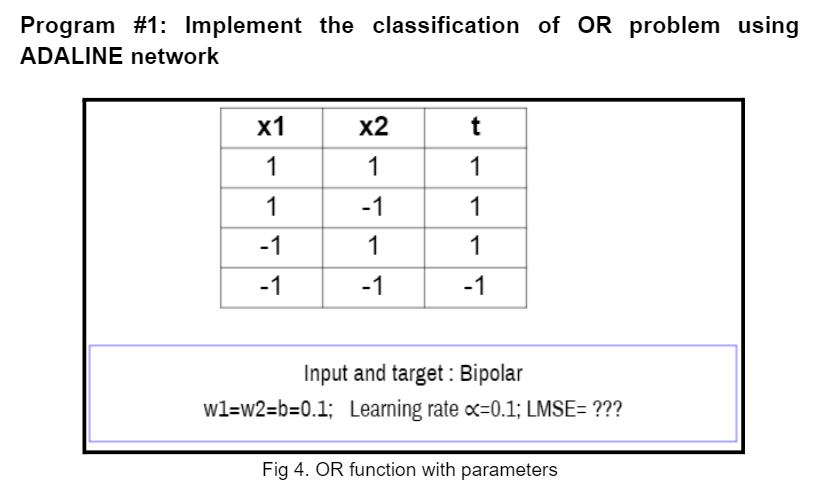

In [1]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
class ActivationFunctions:
    def __init__(self):
        pass
    @classmethod
    def binary(self, y, theta=0):
        """
        If the value of Y is above a certain value known as the threshold,
        the output is True(or activated)
        If it’s less than the threshold then the output is false (or not activated)
        Returns:
            Either 0 or 1
        """
        if y >= theta:
            return 1
        return 0

    def bipolar_step(self, y, theta=0):
        """
        If the value of Y is above a certain value known as the threshold,
        the output is +1 and 
        if it’s less than the threshold then the output is -1. 
        Returns:
            It has bipolar outputs (+1 to -1).
        """
        if y >= theta:
            return 1
        return -1

    def binary_sigmoidal(self, y):
        """
        Also known as Logistic Function/Sigmoid Function
        Differentiable, non-linear, and produces non-binary activations 
        But the problem with Sigmoid vanishing gradients and not a zero-centric function.
        Returns:
            Values are either binary or vary from 0 to 1. 
        """
        return 1/(1+math.exp(-y))

    def bipolar_sigmoid(self, y):
        """
        Also known as Hyperbolic Tangent Function or Tanh
        The Tanh activation function is calculated as follows:
        (e^x – e^-x) / (e^x + e^-x)
        
        The function takes any real value as input and outputs values in the range -1 to 1. 
        The larger the input (more positive), the closer the output value will be to 1.0, 
        whereas the smaller the input (more negative), the closer the output will be to -1.0.
        Returns:
           Output within the range -1 and 1
           
        """
        return math.tanh(y)

    def signum(self, y):
        if y<0:
            return -1
        elif y>0:
            return 1
        return 0

In [3]:
def plot_type(plt_type):
        if plt_type == "and":
        #Plot the points
            x, y = inputs.T
            fig, ax = plt.subplots(figsize=(11,8))
            plt.title('AND Gate Target Plot and Classifier Line')
            x2 = []
            for i in range(0,len(x)):
                if (x[i]==1 and y[i]==1):
                    ax.plot(x[i], y[i], marker='x', linestyle='', ms=12)
                else:
                    ax.plot(x[i], y[i], marker='o', linestyle='', ms=12)
            plt.plot([2,-2],[0,2])
        if plt_type == "or":
            x, y = inputs.T
            fig, ax = plt.subplots(figsize=(11,8))
            plt.title('OR Gate Target Plot and Classifier Line')
            x2 = []
            for i in range(0,len(x)):
                if (x[i]==-1 and y[i]==-1):
                    ax.plot(x[i], y[i], marker='x', linestyle='', ms=12)
                else:
                    ax.plot(x[i], y[i], marker='o', linestyle='', ms=12)
            plt.plot([-1,0],[0,-1])

In [4]:
def AdalineNetwork(inputs,wt,tgt,epoch,learning_rate,bias,activation="bipolar_step",error_threshold= 0.01,plt_type=None):
    """
        Args:
            inputs(np.array): An array of input rows.
            wt(np.array): An array of input weights for the perceptron
            tgt(int): Target/Labels/Output of Input data.
            epoch(int): Number of epochs
            learning_rate(float): Learning rate
            bias(float): Bias for the perceptron
            activation(str): The type of activation function to be applied
            plot(bool): Plots the Target. 
            Turn to True if you want to plot the graph.
    """
    rows = []
    X_cols = []
    w_cols = []
    ocols = ['bias','Yin','Yout','(t-yin)','(t-yin)^2']
    for xi in range(0,inputs.shape[1]):
        X_cols.append(f"X{xi}")
        w_cols.append(f"wt{xi}")
    X_cols.append('T')
    X_cols.extend(w_cols)
    X_cols.extend(ocols)
    cols=X_cols
    #--Comments disabled for debugging
    #print(cols)
    epoch_errors = []
    for epoch in range(0,epoch):
        errors = []
        for i in range(0,inputs.shape[0]):
            data = []
            #print("------Row:",inputs[i])
            #print("Weight",wt,"Bias",bias)
            yin = np.dot(inputs[i],wt) + bias
            activation_func = {
                               "binary": ActivationFunctions().binary(yin),
                               "bipolar_step": ActivationFunctions().bipolar_step(yin),
                               "binary_sigmoidal": ActivationFunctions().binary_sigmoidal(yin),
                               "bipolar_sigmoid": ActivationFunctions().bipolar_sigmoid(yin)
            }
            yout = activation_func[activation]
            #print("Yin,Yout",yin,yout)
            for j in range(0,inputs.shape[1]):
                #print(yout!=tgt[i])
                #if yout != tgt[i]:
                wt[j] = wt[j] + learning_rate*(tgt[i]-yin)*inputs[i][j]
                #print(f"W{j}", wt[j])
                if j+1 == inputs.shape[1]:
                    bias = bias + learning_rate*(tgt[i]-yin)
                    #print("B",bias)
            data.extend(inputs[i])
            data.append(tgt[i])
            data.extend(wt)
            data.extend([bias,yin,yout,tgt[i]-yin,(tgt[i]-yin)**2])
            rows.append(data)
            errors.append((tgt[i]-yin)**2)
        epoch_errors.append(sum(errors)/len(errors))
    #print(rows)
    df = pd.DataFrame(rows, columns=cols)
    if plt_type:
        plot_type(plt_type)
    #print(epoch_errors)
    error_df = pd.DataFrame(columns=['Mean Squared Error'])
    for i in epoch_errors:
        error_df.loc[f"Epoch {epoch_errors.index(i)+1}",'Mean Squared Error'] = i
    return df,error_df

In [5]:
inputs = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
w = np.array([0.1,0.1])
t = np.array([1,1,1,-1])
b = 0.1
alpha = 0.1

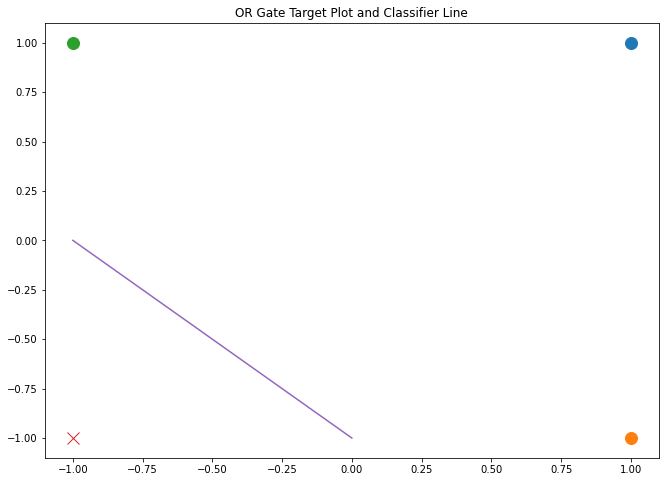

In [6]:
df, error_df = AdalineNetwork(inputs=inputs,wt=w,tgt=t,epoch=5,learning_rate=alpha,bias=b,activation="bipolar_step",plt_type="or")

In [7]:
df

,X0,X1,T,wt0,wt1,bias,Yin,Yout,(t-yin),(t-yin)^2
0,1,1,1,0.170000,0.170000,0.170000,0.300000,1,0.700000,0.490000
1,1,-1,1,0.253000,0.087000,0.253000,0.170000,1,0.830000,0.688900
2,-1,1,1,0.161700,0.178300,0.344300,0.087000,1,0.913000,0.833569
3,-1,-1,-1,0.262130,0.278730,0.243870,0.004300,1,-1.004300,1.008618
4,1,1,1,0.283657,0.300257,0.265397,0.784730,1,0.215270,0.046341
5,1,-1,1,0.358777,0.225137,0.340517,0.248797,1,0.751203,0.564306
6,-1,1,1,0.279465,0.304449,0.419830,0.206877,1,0.793123,0.629045
7,-1,-1,-1,0.363057,0.388041,0.336238,-0.164084,-1,-0.835916,0.698755
8,1,1,1,0.354323,0.379307,0.327505,1.087335,1,-0.087335,0.007627
9,1,-1,1,0.424071,0.309559,0.397252,0.302520,1,0.697480,0.486478


In [8]:
error_df

,Mean Squared Error
Epoch 1,0.755272
Epoch 2,0.484612
Epoch 3,0.387326
Epoch 4,0.354378
Epoch 5,0.344556


<AxesSubplot:title={'center':'Loss Function'}, xlabel='Epoch', ylabel='Mean Squared Error'>

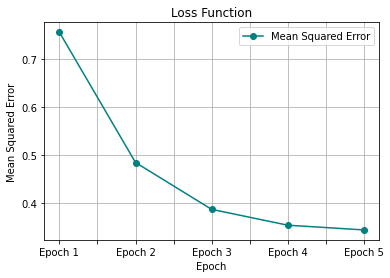

In [9]:
error_df.plot(kind="line",title="Loss Function", xlabel="Epoch",ylabel="Mean Squared Error",color="teal", grid=True,marker='o')

## Part 2: ............................................MADALINE................................

In [126]:
inputs = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
w = np.array([[0.05,0.2],[0.1,0.2]])
t = np.array([-1,1,1,-1])
hidden_nodes = np.array([0,0])
b = [0.3,0.15,0.5]
v=[0.5,0.5]
alpha = 0.1

In [127]:
def MadalineNetwork(inputs=inputs, hidden_nodes=2,epochs=5,tgt=t, weights=w, bias=b, fixed_vs=v):
    h_nodes = np.zeros(hidden_nodes)
    zout = np.zeros(hidden_nodes)
    for epoch in range(0,epochs):
        print(f"-------Epoch {epoch+1}-------")
        print("Inputs\tTarget\tZ(in)\t\tZoutt\tY(in)t\tY(out)t\tWeightst\t\tBiases\t\t\tFixed V")
        for ip in range(0, inputs.shape[0]):
            #print(f"Sample {ip}")
            for n in range(0, h_nodes.shape[0]):
                #print(h_nodes)
                #print(w[n])
                #print(bias[n])
                #print(inputs[ip])
                h_nodes[n] = np.dot(inputs[ip],w[n]) + bias[n]
            #print("Final",h_nodes)
            for zin in range(0,h_nodes.shape[0]):
                zout[zin] = ActivationFunctions().bipolar_step(y=h_nodes[zin])
                #print(zout)
            yin = bias[2] + np.dot(zout,fixed_vs)
            #print(yin)
            yout = ActivationFunctions().bipolar_step(y=yin)
           #print(yout)
            print(inputs[ip],' ',tgt[ip],' ',h_nodes,' ',zout,' ',yin,' ',yout,' ',w,' ',b,' ',fixed_vs)
            if (tgt[ip]!=yout) and tgt[ip]==1:
                #print("In +1 t")
                to_upd_idx = list(h_nodes).index(min(h_nodes, key=lambda x:abs(x-0)))
                bias[to_upd_idx] = bias[to_upd_idx] + 0.5*(tgt[ip]-h_nodes[to_upd_idx])
                for i in range(0,len(w[to_upd_idx])):
                    w[to_upd_idx][i] =  w[to_upd_idx][i] + 0.5*(tgt[ip]-h_nodes[to_upd_idx])*inputs[ip][i]
            elif (tgt[ip]!=yout) and tgt[ip]==-1:
                #print("In -1 t")
                if (False if False in [x > 0 for x in h_nodes] else True):
                    for i in range(0,w.shape[0]):
                        for j in range(0,w.shape[0]):
                            #print(f"w{j}{i}({w[j][i]})= w{j}{i}+0.5*({tgt[ip]}-{h_nodes[j]})*{inputs[ip][i]}")
                            w[j][i] = w[j][i] + 0.5*(tgt[ip]-h_nodes[j])*inputs[ip][i]
                            if j+1 == w.shape[0]:
                                bias[i] = bias[i] + 0.5*(tgt[ip]-h_nodes[j])

                #print("weights",w,"bias",b)
    

In [128]:
MadalineNetwork(inputs=inputs, hidden_nodes=2,epochs=3,tgt=t, weights=w, bias=b, fixed_vs=v)

-------Epoch 1-------
Inputs	Target	Z(in)		Zoutt	Y(in)t	Y(out)t	Weightst		Biases			Fixed V
[1 1]   -1   [0.55 0.45]   [1. 1.]   1.5   1   [[0.05 0.2 ]
 [0.1  0.2 ]]   [0.3, 0.15, 0.5]   [0.5, 0.5]
[ 1 -1]   1   [-0.575 -0.675]   [-1. -1.]   -0.5   -1   [[-0.725 -0.575]
 [-0.625 -0.525]]   [-0.4250000000000001, -0.5750000000000001, 0.5]   [0.5, 0.5]
[-1  1]   1   [-1.0625 -0.475 ]   [-1. -1.]   -0.5   -1   [[ 0.0625 -1.3625]
 [-0.625  -0.525 ]]   [0.3625, -0.5750000000000001, 0.5]   [0.5, 0.5]
[-1 -1]   -1   [1.6625 1.3125]   [1. 1.]   1.5   1   [[ 0.0625 -1.3625]
 [-1.3625  0.2125]]   [0.3625, 0.16249999999999998, 0.5]   [0.5, 0.5]
-------Epoch 2-------
Inputs	Target	Z(in)		Zoutt	Y(in)t	Y(out)t	Weightst		Biases			Fixed V
[1 1]   -1   [0.56875 0.16875]   [1. 1.]   1.5   1   [[ 1.39375 -0.03125]
 [-0.20625  1.36875]]   [-0.7937500000000002, -0.9937500000000002, 0.5]   [0.5, 0.5]
[ 1 -1]   1   [ 0.046875 -3.153125]   [ 1. -1.]   0.5   1   [[ 0.609375 -0.815625]
 [-0.790625  0.784375]]   [